In [10]:
import tensorflow as tf

In [2]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy import genfromtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

In [183]:
x_train = np.loadtxt('input.csv' , delimiter=',')
y_train = np.loadtxt('labels.csv' , delimiter=',')
x_test = np.loadtxt('input_test.csv' , delimiter=',')
y_test = np.loadtxt('labels_test.csv' , delimiter=',')

In [196]:
print("shape of x_train", x_train.shape)
print("shape of y_train", y_train.shape)
print("shape of x_test", x_test.shape)
print("shape of y_test", y_test.shape)


shape of x_train (2000, 16384)
shape of y_train (2000, 1)
shape of x_test (400, 16384)
shape of y_test (400, 1)


In [200]:
x_train=x_train.reshape(len(x_train),100,100,3)

ValueError: cannot reshape array of size 32768000 into shape (2000,100,100)

In [198]:
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)

ValueError: cannot reshape array of size 6553600 into shape (400,100,100,3)

In [187]:
y_test=y_test.reshape(len(y_test),1)

In [188]:
x_train=x_train/255.0
x_test=x_test/255.0

In [189]:
x_train[1,:]

array([0.51372549, 0.50196078, 0.52941176, ..., 0.09411765, 0.09803922,
       0.10196078])

TypeError: Invalid shape (16384,) for image data

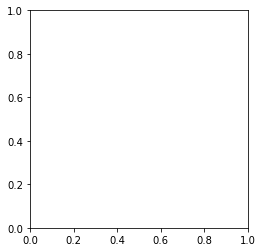

In [190]:
idx=random.randint(0 , len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [191]:
models2=Sequential()
models2.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
models2.add(MaxPooling2D(2,2))
models2.add(Flatten())
models2.add(Dense(64,activation='relu'))
models2.add(Dense(1,activation='sigmoid'))

In [192]:
models2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [193]:
models2.fit(x_train,y_train,epochs=4,batch_size=64)

ValueError: Error when checking input: expected conv2d_26_input to have 4 dimensions, but got array with shape (2000, 16384)

In [177]:
models2.evaluate(x_test,y_test)

400/400 [==============================] - 0s 518us/sample - loss: 0.6523 - accuracy: 0.6900


[0.6522893226146698, 0.69]

In [174]:
idx2=random.randint(0,len(y_test))

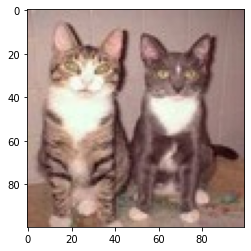

our model says its a:  cat


In [175]:
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if (y_pred==0):
    pred='dog'
else:
    pred='cat'
print ("our model says its a: ",pred)